In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#Importamos la base de datos
properati = pd.read_csv("properati.csv")

In [3]:
#Como todas las filas en "operation" son ventas, 
#la columna no añade informacion, por lo que se remueve
properati = properati.drop(columns="operation")

In [4]:
#Por ahora nos deshacemos de las columnas "country_name","geonames_id","lat-lon","lat","lon","place_with_parent_names","place_name","properati_url","image_thumbnail"
properati = properati.drop(columns=["floor","expenses","country_name","geonames_id","lat-lon","lat","lon","place_with_parent_names","properati_url","image_thumbnail"])

In [5]:
#Se le colocan estandares a las variables para lidiar con datos extremos
properati = properati[properati.price_usd_per_m2 < 8000]

properati = properati[properati.price_usd_per_m2 > 500]

properati = properati[properati.surface_covered_in_m2 < 600]

properati = properati[properati.surface_covered_in_m2 > 30]

properati = properati[properati.surface_total_in_m2 > 30]

properati = properati[properati.surface_total_in_m2 < 1000]

properati.shape

(53056, 15)

In [6]:
def cuenta_numeros(string,existe_amb):
    
    #Asigna numeros basados en texto encontrados en un string
    #existe_amb se refiere al sitio donde se encontro una variante de la cadena de caracteres "ambientes"
    #Directamente relacionada con la funcion cuenta_ambientes
    
    if string[existe_amb - 3:existe_amb + 1] == " un ":
        return 1
    
    if string[existe_amb - 4:existe_amb + 1] == " dos ":
        return 2
    
    if string[existe_amb - 5:existe_amb + 1] == " tres ":
        return 3
    
    if string[existe_amb - 7:existe_amb + 1] == " cuatro ":
        return 4
    
    if string[existe_amb - 6:existe_amb + 1] == " cinco ":
        return 5
    
    if string[existe_amb - 5:existe_amb + 1] == " seis ":
        return 6
    
    if string[existe_amb - 6:existe_amb + 1] == " siete ":
        return 7
    
    if string[existe_amb - 5:existe_amb + 1] == " ocho ":
        return 8
    
    

In [7]:
def cuenta_ambientes(string):
    #Programa para contar la cantidad de ambientes en title o descripcion, requiere de la funcion cuenta_numeros.
    numero = 0 #Variable dummy, no es posible que un inmueble tenga cero ambientes.
    string = string.lower() #Reducimos todos los caracteres a minuscula.
    
    existe_amb = string.find(" amb ") #Se hace la primera busqueda, en caso de fallar, devuelve -1.
    
    if existe_amb == -1: #Las preguntas son para conocer si no se ha encontrado la palabra anterior.
        existe_amb = string.find(" amb.")
    
    if existe_amb == -1:
        existe_amb = string.find(" ambientes")
    
    if existe_amb == -1:
        existe_amb = string.find(" ambientes.")
        
    if existe_amb == -1:
        existe_amb = string.find(" ambientes,")
        
    if existe_amb == -1:
        existe_amb = string.find(" ambiente ")
    
    if existe_amb == -1:
        existe_amb = string.find(" ambiente.")
        
    if existe_amb == -1:
        existe_amb = string.find(" dormitorios") 
        
    if existe_amb == -1:
        if string.find(" monoambiente") != -1:
            return 1
        
    if existe_amb == -1:
        if string.find(" monoambiente.") != -1:
            return 1
        
    if existe_amb == -1:
        if string.find(" monoambiente,") != -1:
            return 1
    if existe_amb == -1:
        if string.find(" ambiente unico ") != -1:
            return 1
        
    try: 
        numero = int(string[existe_amb - 2: existe_amb])
    except:
        try:
            numero = int(string[existe_amb - 1: existe_amb])
        except:
            try:
                numero = cuenta_numeros(string,existe_amb)
                return numero
            except:
                existe_amb = -1
                pass
            pass
        
    
    if existe_amb != -1 and numero != 0:
        return abs(numero)
    else:
        return np.nan
    
    
##IDEA: Usar un while y una lista para optimizar esta funcion.

In [8]:
prop_title = properati[["title"]]
prop_desc = properati[["description"]]

c = prop_title.applymap(cuenta_ambientes)
d = prop_desc.applymap(cuenta_ambientes)

print(c.dropna().shape)
print(d.dropna().shape)


(14881, 1)
(35500, 1)


In [9]:
#Rellenamos los datos que no se tenian, con los rooms encontrados.

properati["rooms"].fillna(c["title"],inplace=True) 
properati["rooms"].fillna(d["description"],inplace=True)

In [10]:
properati.isnull().sum()

Unnamed: 0                        0
property_type                     0
place_name                       15
state_name                        0
price                             0
currency                          0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2               0
surface_covered_in_m2             0
price_usd_per_m2                  0
price_per_m2                      0
rooms                         10836
description                       0
title                             0
dtype: int64

In [11]:
#Utilizamos una lista de los states que no deseamos que se encuentren en el dataframe.
#Seleccionamos todos los demas.

for i in ['Jujuy','Santiago Del Estero','San Juan','Catamarca','Santa Cruz',"La Pampa","Chaco"]:
    properati = properati[properati.state_name != i] #Es decir, los que no sean de allí.
    
#properati[["state_name","price"]].groupby("state_name").count().sort_values("price")

In [12]:
#aux = properati[["place_name","price"]].groupby("place_name").count().sort_values("price")>10
#aux.shape

In [13]:
#aux.price.sum()

In [14]:
#Dummies de las columnas listas
properati = pd.get_dummies(properati,["prop_type","curr","state","place"],columns=["property_type","currency","state_name","place_name"])

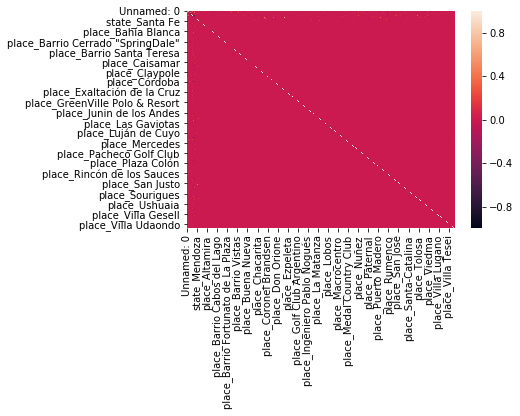

In [15]:
sns.heatmap(properati.corr())

In [16]:
properati.dropna().to_csv("properati_Tasado_Lineal.csv", encoding='utf-8', index=False)

In [20]:
properati.describe()

,Unnamed: 0,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,prop_type_PH,...,place_Villa del Parque,place_Village Golf & Tennis Country Club,place_Virasoro Village,place_Virrey del Pino,place_Virreyes,place_Wilde,place_William Morris,place_Yerba Buena,place_Zelaya,place_coordenadas 34.255511
count,53019.000000,5.301900e+04,5.301900e+04,5.301900e+04,53019.000000,53019.000000,53019.000000,53019.000000,42199.000000,53019.000000,...,53019.000000,53019.000000,53019.000000,53019.000000,53019.000000,53019.000000,53019.000000,53019.000000,53019.000000,53019.000000
mean,61091.035685,4.696968e+05,4.208587e+06,2.385212e+05,133.833343,109.008393,2041.456348,6257.424295,2.822768,0.053170,...,0.006130,0.000075,0.000019,0.000019,0.000132,0.001471,0.000019,0.000132,0.000019,0.000019
std,33073.408882,9.795426e+05,4.225700e+06,2.394911e+05,130.031379,92.468003,1002.655493,12866.392990,1.325908,0.224374,...,0.078054,0.008686,0.004343,0.004343,0.011490,0.038328,0.004343,0.011490,0.004343,0.004343
min,0.000000,2.450000e+04,4.156187e+05,2.355514e+04,31.000000,31.000000,500.401724,133.333333,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32836.500000,1.200000e+05,1.799739e+06,1.020000e+05,52.000000,47.000000,1363.636364,1672.902098,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61951.000000,1.980000e+05,2.823120e+06,1.600000e+05,81.000000,70.000000,1880.952381,2337.662338,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,89171.000000,4.000000e+05,5.028682e+06,2.850000e+05,170.000000,140.000000,2518.518519,3359.687500,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,121219.000000,5.000000e+07,7.410690e+07,4.200000e+06,994.000000,598.000000,7978.723404,476190.476190,74.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
